In [1]:
import pandas as pd
import numpy as np

In [2]:
processed = 'processed'
submissions = 'submissions'
features = 'features'
df_train = pd.read_csv(f'{processed}/train.csv')
df_test =  pd.read_csv(f'{processed}/test.csv')

In [3]:
df_train = df_train.merge(pd.read_csv(f'{features}/age_quantiles_train.csv'))
df_test =  df_test.merge(pd.read_csv(f'{features}/age_quantiles_test.csv'))

In [4]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cl = GradientBoostingClassifier()
field_name = 'Survived'
feature_names = ['SibSp', 'Sex_male', 'Sex_female'] + [col for col in df_test.columns if 'Age_q_' in col]
kfold = KFold(random_state=42, n_splits=2)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(cl, df_train[feature_names], df_train[field_name], cv=kfold)
np.mean(accuracies)

0.8069456341008716

In [5]:
feature_names

['SibSp',
 'Sex_male',
 'Sex_female',
 'Age_na',
 'Age_is(0..2]',
 'Age_is(2..6]',
 'Age_is(6..14]',
 'Age_is(14..16]',
 'Age_is(16..18]',
 'Age_is(18..25]',
 'Age_is(25..35]',
 'Age_is(35..40]',
 'Age_is(40..45]',
 'Age_is(45..60]',
 'Age_is(60..80]',
 'Age_q_is(0.169..14.0]',
 'Age_q_is(14.0..19.0]',
 'Age_q_is(19.0..22.0]',
 'Age_q_is(22.0..25.0]',
 'Age_q_is(25.0..28.0]',
 'Age_q_is(28.0..31.0]',
 'Age_q_is(31.0..36.0]',
 'Age_q_is(36.0..42.0]',
 'Age_q_is(42.0..50.0]',
 'Age_q_is(50.0..80.0]']

In [8]:
cl.fit(df_train[feature_names], df_train[field_name])
y_test = cl.predict(df_test[feature_names])
df_submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})
df_submit['Survived'] = df_submit['Survived'].astype(int)
df_submit.to_csv(f'{submissions}/submission014.csv', index=False)

In [9]:
# LB score: 0.77990 (vs 0.76555 with no Age_ stuff, but human-curated bins gave 0.78468)
!head submissions/submission013.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,1
898,1
899,0
900,1


In [13]:
!open submissions
!open https://www.kaggle.com/c/titanic/submit

In [11]:
df_features = pd.DataFrame({'name': feature_names, 'importance': cl.feature_importances_})
df_features.sort_values('importance', ascending=False, inplace=True)

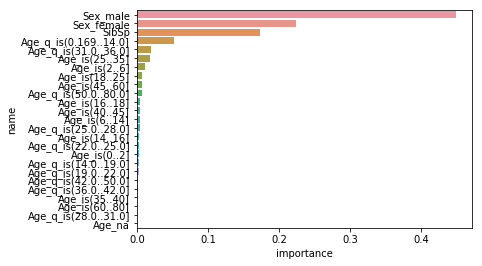

In [12]:
%matplotlib inline
import seaborn as sns
sns.barplot(x="importance", y="name", data=df_features)